In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

In [2]:
raw_data = pd.read_csv('customer_booking.csv', encoding ="ISO-8859-1")
data = raw_data.copy()
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [4]:
s = ['sales_channel','trip_type','flight_day']

for i in s:
    print(data[i].value_counts())
    print('\n')

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64


trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64


flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64




<Axes: xlabel='sales_channel', ylabel='count'>

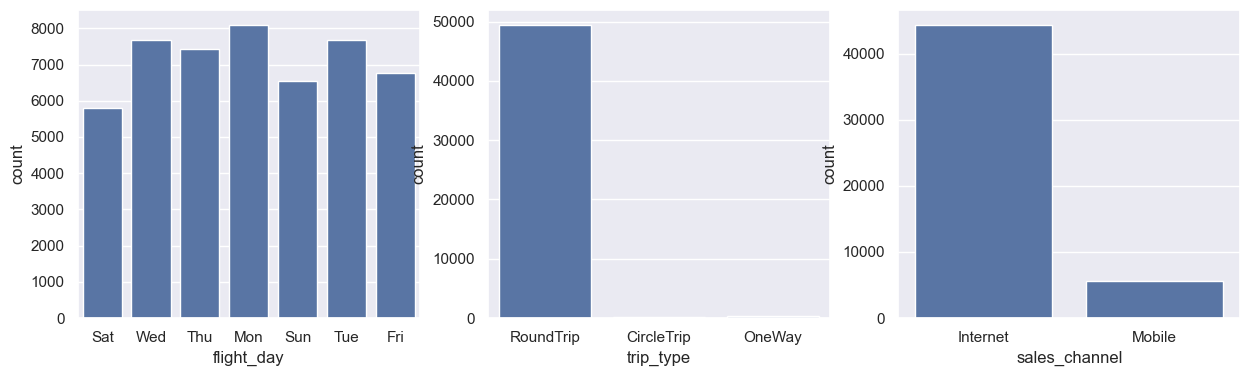

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4)) 

sb.countplot(x=data.flight_day, ax=ax[0])
sb.countplot(x=data.trip_type, ax= ax[1])
sb.countplot(x=data.sales_channel, ax= ax[2])

In [6]:
route_counts = data.route.value_counts()
route_counts= route_counts.reset_index()
route_counts

,route,count
0,AKLKUL,2680
1,PENTPE,924
2,MELSGN,842
3,ICNSIN,801
4,DMKKIX,744
...,...,...
794,LBUTPE,1
795,CXRMEL,1
796,DELKBR,1
797,KOSSYD,1


In [7]:
routes_remove = route_counts.route[route_counts['count'] < 5]

In [8]:
mapping = {
    'Mon':0,
    'Tue':1 ,
    'Wed': 2, 
    'Thu':3,
    'Fri' :4, 
    'Sun':5,
    'Sat':6
}

In [9]:
data.flight_day	 = data.flight_day.map(mapping)
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,2,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,2,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,5,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,0,PERPNH,Australia,1,0,1,5.62,0


In [10]:
data['sales_channel'] = data['sales_channel'].map({'Internet': 1, 'Mobile': 0})

In [11]:
for i in routes_remove:
    data = data.drop(data.route[data['route'] == i].index)
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,RoundTrip,243,22,17,2,AKLDEL,India,1,1,0,5.52,0
3,1,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,RoundTrip,68,22,15,2,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,1,RoundTrip,111,6,4,5,PERPNH,Australia,0,0,0,5.62,0
49997,1,1,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,1,RoundTrip,15,6,11,0,PERPNH,Australia,1,0,1,5.62,0


In [12]:
route_dummies = pd.get_dummies(data.route, drop_first= 'True')
route_dummies= route_dummies.astype('int')
trip_dummies = pd.get_dummies(data.trip_type, drop_first= 'True')
trip_dummies = trip_dummies.astype('int')
booking_dummies = pd.get_dummies(data.booking_origin, drop_first= "True")
booking_dummies = booking_dummies.astype('int')

In [13]:
data= pd.concat([data, route_dummies,booking_dummies, trip_dummies], axis= 1)
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam,OneWay,RoundTrip
0,2,1,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1,RoundTrip,243,22,17,2,AKLDEL,India,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,RoundTrip,68,22,15,2,AKLDEL,India,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,RoundTrip,27,6,9,6,PERPNH,Australia,1,...,0,0,0,0,0,0,0,0,0,1
49996,1,1,RoundTrip,111,6,4,5,PERPNH,Australia,0,...,0,0,0,0,0,0,0,0,0,1
49997,1,1,RoundTrip,24,6,22,6,PERPNH,Australia,0,...,0,0,0,0,0,0,0,0,0,1
49998,1,1,RoundTrip,15,6,11,0,PERPNH,Australia,1,...,0,0,0,0,0,0,0,0,0,1


In [14]:
data = data.drop(['trip_type','booking_origin','route'], axis= 1)
data

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam,OneWay,RoundTrip
0,2,1,262,19,7,6,1,0,0,5.52,...,0,0,0,0,0,0,0,0,0,1
1,1,1,112,20,3,6,0,0,0,5.52,...,0,0,0,0,0,0,0,0,0,1
2,2,1,243,22,17,2,1,1,0,5.52,...,0,0,0,0,0,0,0,0,0,1
3,1,1,96,31,4,6,0,0,1,5.52,...,0,0,0,0,0,0,0,0,0,1
4,2,1,68,22,15,2,1,0,1,5.52,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,27,6,9,6,1,0,1,5.62,...,0,0,0,0,0,0,0,0,0,1
49996,1,1,111,6,4,5,0,0,0,5.62,...,0,0,0,0,0,0,0,0,0,1
49997,1,1,24,6,22,6,0,0,1,5.62,...,0,0,0,0,0,0,0,0,0,1
49998,1,1,15,6,11,0,1,0,1,5.62,...,0,0,0,0,0,0,0,0,0,1


In [15]:
features = data.copy()
features= features.drop('booking_complete', axis = 1)
target = data['booking_complete']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state= 42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 10)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [19]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(clf, x_train,y_train,cv= 5)
score

array([0.847385  , 0.85066163, 0.84587272, 0.84560121, 0.84736577])

In [20]:
print(score.mean())
score.std()

0.8473772644480798


0.0018002920323331097

In [21]:
clf.score(x_train, y_train)

0.9827842613364253

In [22]:
y_hat = clf.predict(x_test)

In [23]:
y_hat

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<Axes: xlabel='booking_complete', ylabel='Count'>

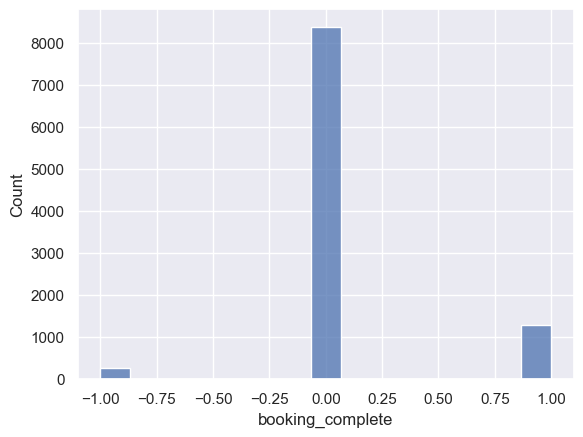

In [24]:
sb.histplot( y_test - y_hat)

In [25]:
importance = clf.feature_importances_
inputs = features.columns

In [26]:
feature_importance_table = pd.DataFrame(
    {
        'Features': inputs,
        'Importance': importance * 100
    }
).sort_values(by= 'Importance', ascending = False)

In [27]:
feature_importance_table

,Features,Importance
2,purchase_lead,15.752820
4,flight_hour,12.764115
3,length_of_stay,11.544638
5,flight_day,9.064247
0,num_passengers,4.925430
...,...,...
639,Bulgaria,0.000000
718,Tanzania,0.000000
648,Czechia,0.000000
695,Paraguay,0.000000


In [81]:
important_features = feature_importance_table[feature_importance_table['Importance'] > 0.3]
important_features

,Features,Importance
2,purchase_lead,15.752820
4,flight_hour,12.764115
3,length_of_stay,11.544638
5,flight_day,9.064247
0,num_passengers,4.925430
9,flight_duration,3.604748
677,Malaysia,2.597630
8,wants_in_flight_meals,2.367138
7,wants_preferred_seat,1.904212
630,Australia,1.809397


In [29]:
important_features['Importance'].sum()

70.65806622855729

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test,y_hat)
matrix = confusion_matrix(y_test,y_hat)
print('Trainning Accuracy:', clf.score(x_train,y_train))
print('Testin Accuracy:', clf.score(x_train,y_train))
print( "Accuracy: ",accuracy)

print("Confusion Matrix :\n",matrix)

Trainning Accuracy: 0.9827842613364253
Testin Accuracy: 0.9827842613364253
Accuracy:  0.8442383304768626
Confusion Matrix :
 [[8161  251]
 [1294  213]]


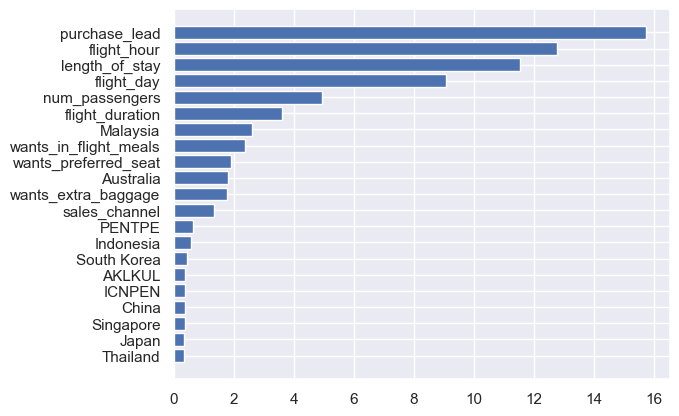

In [89]:
plt.barh(width=important_features.Importance,y =important_features.Features)
plt.gca().invert_yaxis()
plt.savefig('Important_features.png')